In [1]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import dateutil.parser
from threading import Thread
%matplotlib inline

In [2]:
def run_query(query): # A simple function to use requests to make the API call.
   request = requests.get('https://my.es.net/graphql', json={'query': query})
   if request.status_code == 200:
       return request.json()
   else:
       raise Exception("Query failed to run by returning code of {}. {}".format(request.status_code, query))
    

 Edge | id 
 --- | --- 
 CHIC--STAR | 1767
 ATLA--NASH | 1747
 ALBQ--DENV | 1733
 ALBQ--ELPA | 1734
 ALBQ--KCP-ALBQ |1735
 ALBQ--LANL | 1736
 ALBQ--SNLA | 1737
 AMES--STAR | 1738
 AMST--CERN-272 | 1740
 AMST--LOND | 1741
 AOFA--NEWY | 1744
 AOFA--STAR | 1745
 AOFA--WASH | 1746
 DENV--NGA-SW | 1771
 ATLA--ORNL | 1748
 ATLA--WASH | 1751
 BNL--NEWY | 1752
 BOIS--DENV | 1753
 BOIS--INL | 1754
 BOIS--PNWG | 1755
 BOST--LNS | 1756
 BOST--NEWY | 1757
 BOST--PSFC | 1758
 BOST--STAR | 1759
 CERN-272--CERN-513 | 1760
 CERN-513--LOND | 1761
 CERN-513--WASH | 1762
 CERN--CERN-272 | 1763
 CERN--CERN-513 | 1764
 CHIC--KANS | 1765
 CHIC--NASH | 1766
 CHIC--WASH | 1768
 DENV--KANS | 1769
 DENV--LSVN | 1770
 DENV--NREL | 1772
 DENV--PNWG | 1774
 DENV--SACR | 1775
 DOE-FORRESTAL--WASH | 1776
 DOE-GTN--WASH | 1777
 DOE-NNSA--WASH | 1778
 ELPA--HOUS | 1779
 ELPA--SUNN | 1780
 FNAL--STAR | 1782
 GA--SAND | 1783
 HOUS--KANS | 1784
 HOUS--NASH | 1785
 IARC--LSVN | 1786
 JGI--SACR | 1787
 KANS--KCP | 1789
 LBL--NPS | 1791
 LBL--SUNN | 1792
 LIGO--PNWG | 1793
 LLNL--SUNN | 1794
 LOND--NEWY | 1795
 LSVN--NSO | 1796
 PPPL--WASH |1803
 SACR--SNLL | 1804
 PNNL--PNWG | 1801
 PNWG--SACR | 1802
 SACR--SUNN | 1805
 SAND--SUNN | 1806
 SLAC--SUNN | 1807
 ANL--STAR | 1742
 NASH--WASH | 1821
 CHIC--EQX-CHI | 1822
 EQX-ASH--EQX-CHI |1823
 EQX-ASH--WASH | 1824
 NERSC--SUNN | 1797
 HOUS--PANTEX | 1773
 AMST--BOST | 1739
 NASH--ORNL | 1833
 ATLA--Y12 | 1800
 ATLA--ORAU | 1798
 ATLA--OSTI | 1799
 ATLA--SRS | 1749
 ATLA--ETTP | 1781
 EQX-ASH--NETL-MGN | 1834
 EQX-ASH--NETL-PGH | 1835
 JLAB--WASH | 1788
 AOFA--LOND | 1743

In [3]:
id = 1894
beginTime = '2018-05-20T18:22:53.253Z'
endTime = '2018-05-21T19:22:53.253Z'

In [4]:
query = '''
{
  mapTopologyEdge(id: "%d") {
		name
    traffic(beginTime: "%s", endTime: "%s") {
      columns
      name
      points
      utc
      labels
      interface
      device
      sap
      tile
    }
  }
}
''' % (id, beginTime, endTime)

In [5]:
data = run_query(query)

In [6]:
datastr = data["data"]["mapTopologyEdge"]["traffic"]
e1, e2 = datastr["labels"]
cleaned_data = np.array(datastr["points"])

In [7]:
df = pd.DataFrame({'time': cleaned_data[:, 0], e1:cleaned_data[:, 1], e2:cleaned_data[:, 2]})

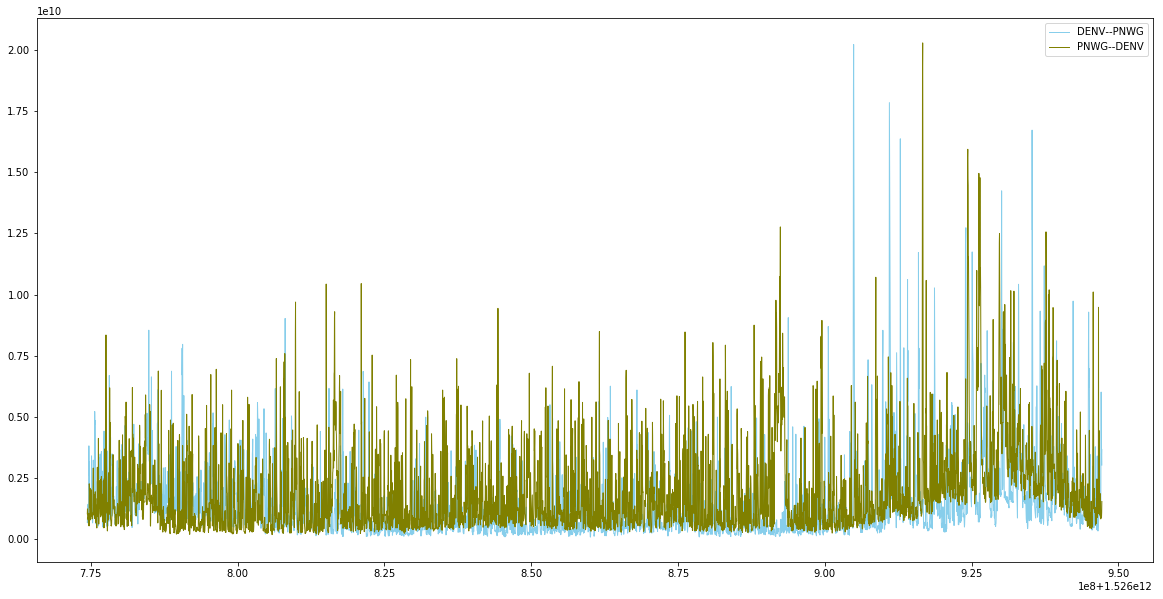

In [8]:
plt.figure(figsize=(20,10))
plt.plot( 'time', e1, data=df, marker='', color='skyblue', linewidth=1)
plt.plot( 'time', e2, data=df, marker='', color='olive', linewidth=1)
plt.legend()


KeyboardInterrupt: 

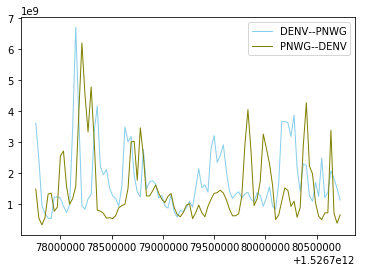

In [9]:
%matplotlib qt
def plot_stream(cleaned_data, e1, e2):    
    import matplotlib.pyplot as plt
    import time

    xdata = []
    ydata1 = []
    ydata2 = []

    plt.show()

    axes = plt.gca()
    line1, = axes.plot(xdata, ydata1, 'skyblue', linewidth=1)
    line2, = axes.plot(xdata, ydata2, 'olive', linewidth=1)
    line1.set_label(e1)
    line2.set_label(e2)
    axes.legend(loc=1)

    for i in cleaned_data:
        if len(xdata) == 100:
            del xdata[0]
            del ydata1[0]
            del ydata2[0]
        xdata.append(i[0])
        ydata1.append(i[1])
        ydata2.append(i[2])
        line1.set_xdata(xdata)
        line1.set_ydata(ydata1)
        line2.set_xdata(xdata)
        line2.set_ydata(ydata2)
        axes.relim()
        axes.autoscale_view()
        plt.draw()
        plt.pause(1e-17)
        time.sleep(0.1)

    # add this if you don't want the window to disappear at the end
    plt.show()
plot_stream(cleaned_data, e1, e2)